In [ ]:
import os
import numpy as np
import pycolmap

from megadepth.utils.projections import get_camera_poses
from megadepth.visualization.view_projections import create_view_projection_figure, pca

In [2]:
sparse_dir = os.path.join("..", "data", "0229", "sparse")
model_1 = "baseline"
model_2 = "superpoint_max-superglue"

### Visualizations without alignment

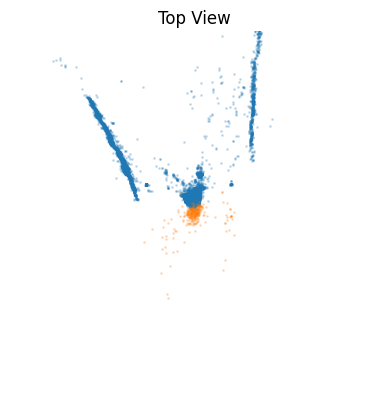

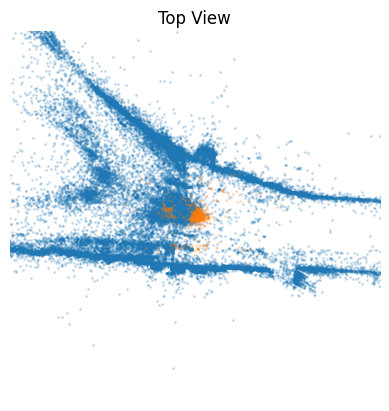

In [3]:
reconstruction_1 = pycolmap.Reconstruction(os.path.join(sparse_dir, model_1))
reconstruction_2 = pycolmap.Reconstruction(os.path.join(sparse_dir, model_2))

camera_poses_1 = get_camera_poses(reconstruction_1)
camera_poses_2 = get_camera_poses(reconstruction_2)

points_1 = np.array([p.xyz for p in reconstruction_1.points3D.values()])
points_2 = np.array([p.xyz for p in reconstruction_2.points3D.values()])

align_1 = pca(camera_poses_1)
align_2 = pca(camera_poses_2)

create_view_projection_figure(
    [align_1(points_1), align_1(camera_poses_1)],
    view=0, limit=15, alpha=0.2
)
create_view_projection_figure(
    [align_2(points_2), align_2(camera_poses_2)],
    view=0, limit=15, alpha=0.2
)

### Visualizations with alignment

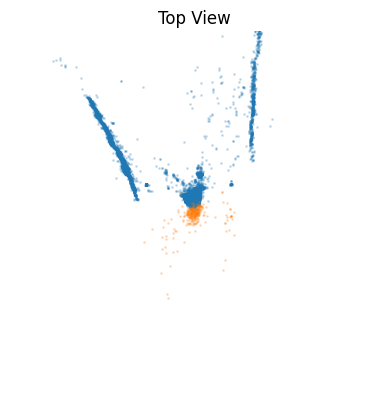

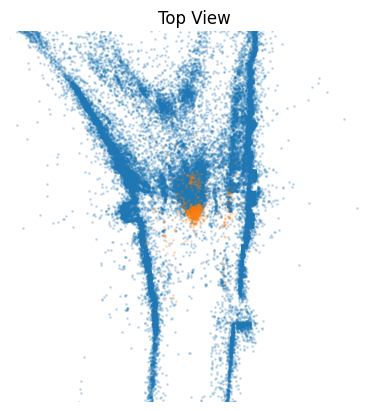

In [4]:
reconstruction_1 = pycolmap.Reconstruction(os.path.join(sparse_dir, model_1))
reconstruction_2 = pycolmap.Reconstruction(os.path.join(sparse_dir, model_2))

# align reconstruction 2 to reconstruction 1
image_names = [img.name for img in reconstruction_1.images.values()]
locations = get_camera_poses(reconstruction_1)
min_common_images = 6
reconstruction_2.align_robust(image_names, locations, min_common_images)

camera_poses_1 = get_camera_poses(reconstruction_1)
camera_poses_2 = get_camera_poses(reconstruction_2)

points_1 = np.array([p.xyz for p in reconstruction_1.points3D.values()])
points_2 = np.array([p.xyz for p in reconstruction_2.points3D.values()])

# now both reconstructions should be in the same coordinate frame and
# we can thus apply the same PCA transformations to both models
align = pca(camera_poses_1)

create_view_projection_figure(
    [align(points_1), align(camera_poses_1)],
    view=0, limit=15, alpha=0.2
)
create_view_projection_figure(
    [align(points_2), align(camera_poses_2)],
    view=0, limit=15, alpha=0.2
)